In [1]:
import session_info
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
session_info.show()

In [4]:
df_train = pd.read_csv('C:/Users/User/Downloads/train.csv', sep=';')
df_train['<DATE>'] = pd.to_datetime(df_train['<DATE>'], format='%y%m%d')
df_train['mid_prices'] = (df_train['<HIGH>'] + df_train['<LOW>']) / 2.0
df_train = df_train[['<DATE>', 'mid_prices', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']]
df_train.sample(10)

NumExpr defaulting to 8 threads.


,<DATE>,mid_prices,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
2012,2018-06-28,185.0050,184.09,186.21,183.800,185.51,13.516.379
2223,2019-05-02,210.3900,209.95,212.65,208.130,209.17,25.053.023
1095,2014-11-05,108.7125,109.13,109.30,108.125,108.86,28.900.656
2095,2018-10-25,219.0650,217.70,221.38,216.750,219.85,19.816.414
1492,2016-06-06,99.7200,97.99,101.89,97.550,98.63,20.113.927
1935,2018-03-09,178.6950,177.96,180.00,177.390,179.96,25.340.139
2487,2020-05-21,318.3800,318.67,320.89,315.870,316.80,2.403.270
2054,2018-08-28,219.7300,219.01,220.54,218.920,219.71,18.420.745
819,2013-10-02,487.7750,485.63,491.80,483.750,489.56,9.064.573
2045,2018-08-15,209.5350,209.20,210.74,208.330,210.30,22.423.860


In [5]:
train_processed = df_train.iloc[:, 1:2].values
train_processed

array([[249.01 ],
       [247.065],
       [249.48 ],
       ...,
       [362.99 ],
       [365.635],
       [367.095]])

In [6]:
train_processed.shape

(2517, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

train_scaled = scaler.fit_transform(train_processed)

In [8]:
train_scaled

array([[0.25951699],
       [0.2563391 ],
       [0.26028491],
       ...,
       [0.44574639],
       [0.450068  ],
       [0.45245346]])

In [9]:
features_set = []
labels = []
for i in range(60, len(train_processed)):
    features_set.append(train_scaled[i-60:i, 0])
    labels.append(train_scaled[i, 0])

In [10]:
features_set, labels = np.array(features_set), np.array(labels)

In [11]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [12]:
features_set.shape

(2457, 60, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
model = Sequential()

In [15]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [16]:
model.add(Dropout(0.2))

In [17]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [18]:
model.add(Dense(units = 1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(features_set, labels, epochs = 60, batch_size = 32)

Epoch 1/60
77/77 [==============================] - 24s 62ms/step - loss: 0.0421
Epoch 2/60
77/77 [==============================] - 5s 67ms/step - loss: 0.0076
Epoch 3/60
77/77 [==============================] - 5s 69ms/step - loss: 0.0052
Epoch 4/60
77/77 [==============================] - 6s 75ms/step - loss: 0.0069
Epoch 5/60
77/77 [==============================] - 5s 69ms/step - loss: 0.0044
Epoch 6/60
77/77 [==============================] - 5s 68ms/step - loss: 0.0038
Epoch 7/60
77/77 [==============================] - 6s 75ms/step - loss: 0.0039
Epoch 8/60
77/77 [==============================] - 6s 75ms/step - loss: 0.0039
Epoch 9/60
77/77 [==============================] - 6s 73ms/step - loss: 0.0038
Epoch 10/60
77/77 [==============================] - 6s 72ms/step - loss: 0.0037
Epoch 11/60
77/77 [==============================] - 5s 68ms/step - loss: 0.0028
Epoch 12/60
77/77 [==============================] - 5s 71ms/step - loss: 0.0045
Epoch 13/60
77/77 [=================

In [21]:
df_test = pd.read_csv('C:/Users/User/Downloads/test.csv', sep=';')
df_test['<DATE>'] = pd.to_datetime(df_test['<DATE>'], format='%y%m%d')
df_test['mid_prices'] = (df_test['<HIGH>'] + df_test['<LOW>']) / 2.0
df_test = df_test[['<DATE>', 'mid_prices', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']]
df_test

,<DATE>,mid_prices,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,2020-07-02,367.095,367.76,370.46,363.73,364.12,1.567.926
1,2020-07-06,372.825,369.93,375.78,369.87,373.81,1.399.249
2,2020-07-07,375.415,375.61,378.60,372.23,372.64,1.474.101
3,2020-07-08,378.940,376.75,381.46,376.42,381.29,1.484.935
4,2020-07-09,381.925,385.09,385.16,378.69,382.59,1.715.059
...,...,...,...,...,...,...,...
248,2021-06-28,134.305,133.42,135.24,133.37,134.74,3.187.628
249,2021-06-29,135.425,134.76,136.49,134.36,136.33,3.504.171
250,2021-06-30,136.640,136.17,137.40,135.88,136.92,3.342.377
251,2021-07-01,136.545,136.56,137.32,135.77,137.26,2.982.095


In [22]:
test_processed = df_test.iloc[:, 1:2].values

In [23]:
apple_total = pd.concat((df_train['mid_prices'], df_test['mid_prices']), axis=0)

In [24]:
test_inputs = apple_total[len(apple_total) - len(df_test) - 60:].values

In [25]:
apple_total

0      249.010
1      247.065
2      249.480
3      254.260
4      258.895
        ...   
248    134.305
249    135.425
250    136.640
251    136.545
252    138.875
Name: mid_prices, Length: 2770, dtype: float64

In [26]:
df_test

,<DATE>,mid_prices,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,2020-07-02,367.095,367.76,370.46,363.73,364.12,1.567.926
1,2020-07-06,372.825,369.93,375.78,369.87,373.81,1.399.249
2,2020-07-07,375.415,375.61,378.60,372.23,372.64,1.474.101
3,2020-07-08,378.940,376.75,381.46,376.42,381.29,1.484.935
4,2020-07-09,381.925,385.09,385.16,378.69,382.59,1.715.059
...,...,...,...,...,...,...,...
248,2021-06-28,134.305,133.42,135.24,133.37,134.74,3.187.628
249,2021-06-29,135.425,134.76,136.49,134.36,136.33,3.504.171
250,2021-06-30,136.640,136.17,137.40,135.88,136.92,3.342.377
251,2021-07-01,136.545,136.56,137.32,135.77,137.26,2.982.095


In [27]:
test_inputs

array([265.345 , 264.3   , 267.38  , 269.715 , 283.05  , 283.465 ,
       285.27  , 281.905 , 269.46  , 275.05  , 278.305 , 280.    ,
       282.24  , 282.005 , 286.785 , 291.45  , 292.425 , 290.005 ,
       297.735 , 301.055 , 303.585 , 307.295 , 312.145 , 315.31  ,
       309.6   , 305.685 , 304.09  , 313.415 , 315.76  , 317.87  ,
       318.38  , 317.275 , 320.35  , 315.875 , 319.565 , 318.815 ,
       319.79  , 321.185 , 324.16  , 323.205 , 327.525 , 330.465 ,
       338.805 , 350.43  , 343.26  , 341.025 , 338.79  , 348.985 ,
       353.27  , 351.335 , 350.855 , 355.335 , 367.34  , 363.635 ,
       361.3   , 359.16  , 356.715 , 362.99  , 365.635 , 367.095 ,
       367.095 , 372.825 , 375.415 , 378.94  , 381.925 , 381.36  ,
       390.425 , 382.255 , 391.49  , 386.61  , 385.945 , 389.105 ,
       391.895 , 389.145 , 378.17  , 364.42  , 376.775 , 375.59  ,
       378.025 , 380.11  , 414.485 , 439.045 , 438.335 , 438.58  ,
       448.995 , 447.575 , 447.545 , 443.165 , 447.15  , 459.9

In [28]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [29]:
test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_inputs[i-60:i, 0])

In [30]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [31]:
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

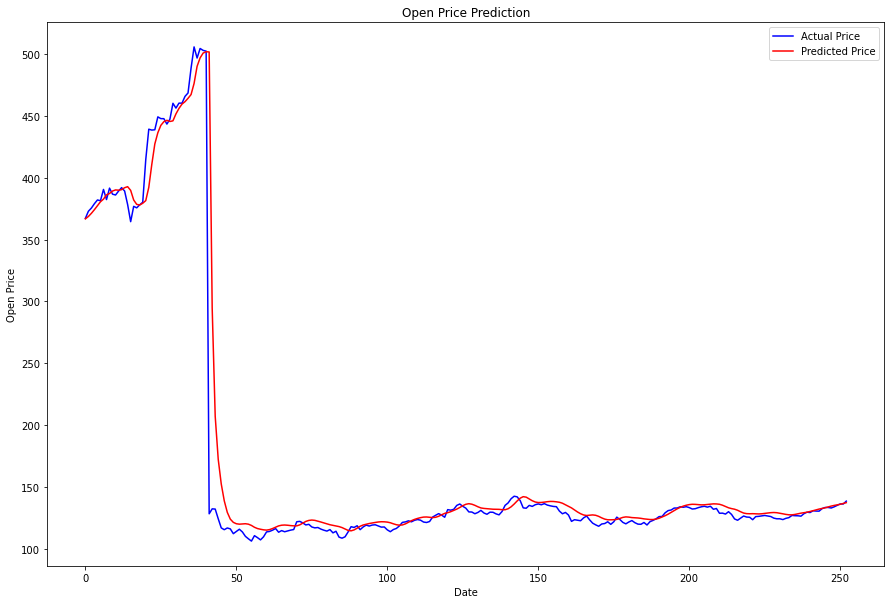

In [32]:
plt.figure(figsize=(15,10))
plt.plot(test_processed, color='blue', label='Actual Price')
plt.plot(predictions , color='red', label='Predicted Price')
plt.title('Open Price Prediction')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()